# Audio Features Analysis

In [37]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import norm
from scipy.special import jv
import seaborn as sns
import warnings

# specify the date format to be parsed
date_format = '%Y-%m-%d'
# read csv files
billboard_cleaned = pd.read_csv('billboard_dataset/processed/billboard_cleaned.csv', parse_dates=['week_id'], date_format=date_format)
audio_features_merged = pd.read_csv('billboard_dataset/processed/audio_features_merged.csv', parse_dates=['week_id'], date_format=date_format)

In [5]:
audio_features_merged.dtypes

song_id                              object
performer                            object
song                                 object
spotify_genre                        object
spotify_track_duration_ms           float64
spotify_track_explicit               object
spotify_track_album                  object
danceability                        float64
energy                              float64
key                                 float64
loudness                            float64
mode                                float64
speechiness                         float64
acousticness                        float64
instrumentalness                    float64
liveness                            float64
valence                             float64
tempo                               float64
time_signature                      float64
spotify_track_popularity            float64
peak_position                         int64
week_id                      datetime64[ns]
weeks_on_chart                  

In [10]:
# list of spotify audio features (values between 0-1)
audio_features_list = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

Description of each feature copied from the Spotify API documentation:

| Feature          | Description                                                                                                                                               |
|:-----------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Danceability     | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable, and 1.0 is most danceable.|
| Energy           | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.|
| Speechiness      | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.|
| Acousticness     | Acousticness is a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence that the track is acoustic.|
| Instrumentalness | Instrumentalness predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater the likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.|
| Liveness         | Liveness detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.|
| Valence          | Valence is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).|


In [11]:
# check for nan values
audio_features_merged.isna().sum()

song_id                         0
performer                       0
song                            0
spotify_genre                4151
spotify_track_duration_ms    5097
spotify_track_explicit       5097
spotify_track_album          5103
danceability                 5159
energy                       5159
key                          5159
loudness                     5159
mode                         5159
speechiness                  5159
acousticness                 5159
instrumentalness             5159
liveness                     5159
valence                      5159
tempo                        5159
time_signature               5159
spotify_track_popularity     5097
peak_position                   0
week_id                         0
weeks_on_chart                  0
dtype: int64

In [12]:
# check if the NaN values are in the same rows columns
audio_features_merged[audio_features_list].isna().all(axis=1).sum()

5159

In [13]:
# drop rows where all audio feature columns are nan
af = audio_features_merged.dropna(subset=audio_features_list, how='all')
print(af.shape)
af.isna().sum()

(24224, 23)


song_id                         0
performer                       0
song                            0
spotify_genre                1594
spotify_track_duration_ms       4
spotify_track_explicit          4
spotify_track_album            10
danceability                    0
energy                          0
key                             0
loudness                        0
mode                            0
speechiness                     0
acousticness                    0
instrumentalness                0
liveness                        0
valence                         0
tempo                           0
time_signature                  0
spotify_track_popularity        4
peak_position                   0
week_id                         0
weeks_on_chart                  0
dtype: int64

In [61]:
# find nan/inf values
af[af['spotify_track_popularity'].isna()]

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart,year
20778,Forever MoreStevie B,Stevie B,Forever More,['freestyle'],NaN,NaN,NaN,0.612,0.794,10.0,...,0.000063,0.1210,0.765,107.988,4.0,NaN,96,1991-11-16,4,1991
26933,A Thousand Miles AwayThe Heartbeats,The Heartbeats,A Thousand Miles Away,NaN,NaN,NaN,NaN,0.461,0.271,7.0,...,0.000000,0.1200,0.425,166.282,5.0,NaN,96,1960-11-05,1,1960
27108,Big City Miss Ruth AnnGallery,Gallery,Big City Miss Ruth Ann,NaN,NaN,NaN,NaN,0.732,0.731,2.0,...,0.028300,0.0723,0.971,128.713,4.0,NaN,23,1973-04-07,15,1973
27364,Do Ya Wanna Get Funky With MePeter Brown,Peter Brown,Do Ya Wanna Get Funky With Me,NaN,NaN,NaN,NaN,0.703,0.804,4.0,...,0.011200,0.3540,0.441,98.074,4.0,NaN,18,1977-12-17,14,1977


In [63]:
# quick data clean using tunebat.com
af.loc[20778, 'spotify_track_popularity'] = 1
af.loc[26933, 'spotify_track_popularity'] = 41
af.loc[27108, 'spotify_track_popularity'] = 17
af.loc[27364, 'spotify_track_popularity'] = 28

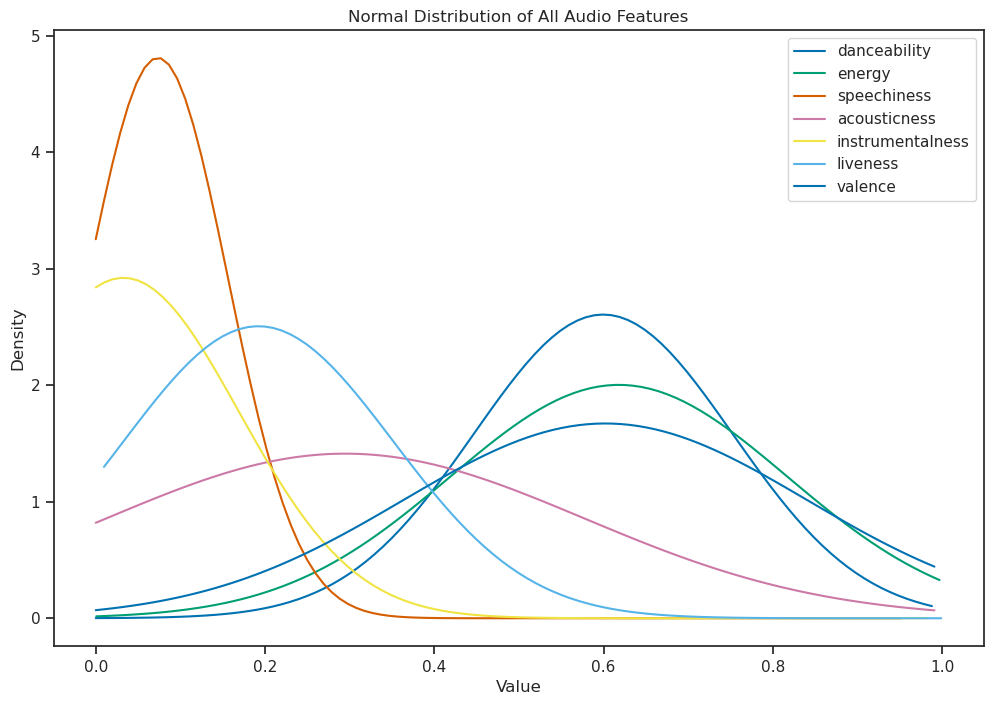

In [73]:
'''Normal Distribution of All Audio Features'''

warnings.filterwarnings("ignore")
plt.style.use("seaborn-colorblind")
plt.figure(figsize=(12, 8))

# plot bell curve for each feature
for feature in af[audio_features_list]:
    data = af[feature]
    x = np.linspace(data.min(), data.max(), 100)
    plt.plot(x, norm.pdf(x, data.mean(), data.std()), label=feature)

plt.title('Normal Distribution of All Audio Features')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()
plt.show()

### Audio Features by Billboard Rank

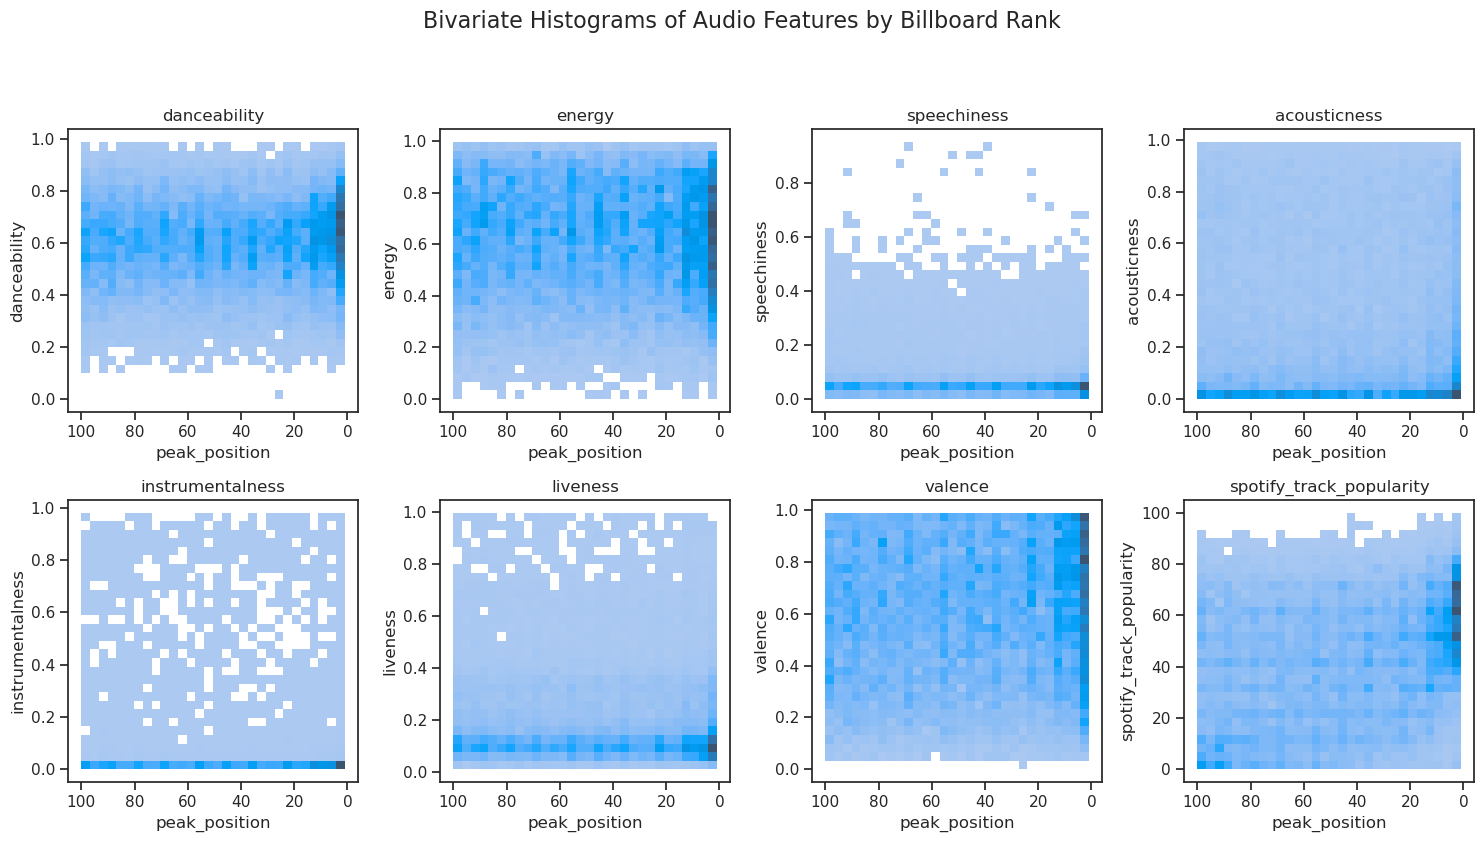

In [77]:
'''Bivariate Histograms of Audio Features by Billboard Rank'''

# create 2x4 subplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# flatten for indexing
axes = axes.flatten()

# iterate through audio features + popularity score
for i, feature in enumerate(audio_features_list + ['spotify_track_popularity']):
    sns.histplot(
        data=af, x="peak_position", y=feature, bins=30, ax=axes[i])
    axes[i].set_title(feature)
    
    # reverse x-axis
    axes[i].invert_xaxis()

plt.suptitle('Bivariate Histograms of Audio Features by Billboard Rank', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

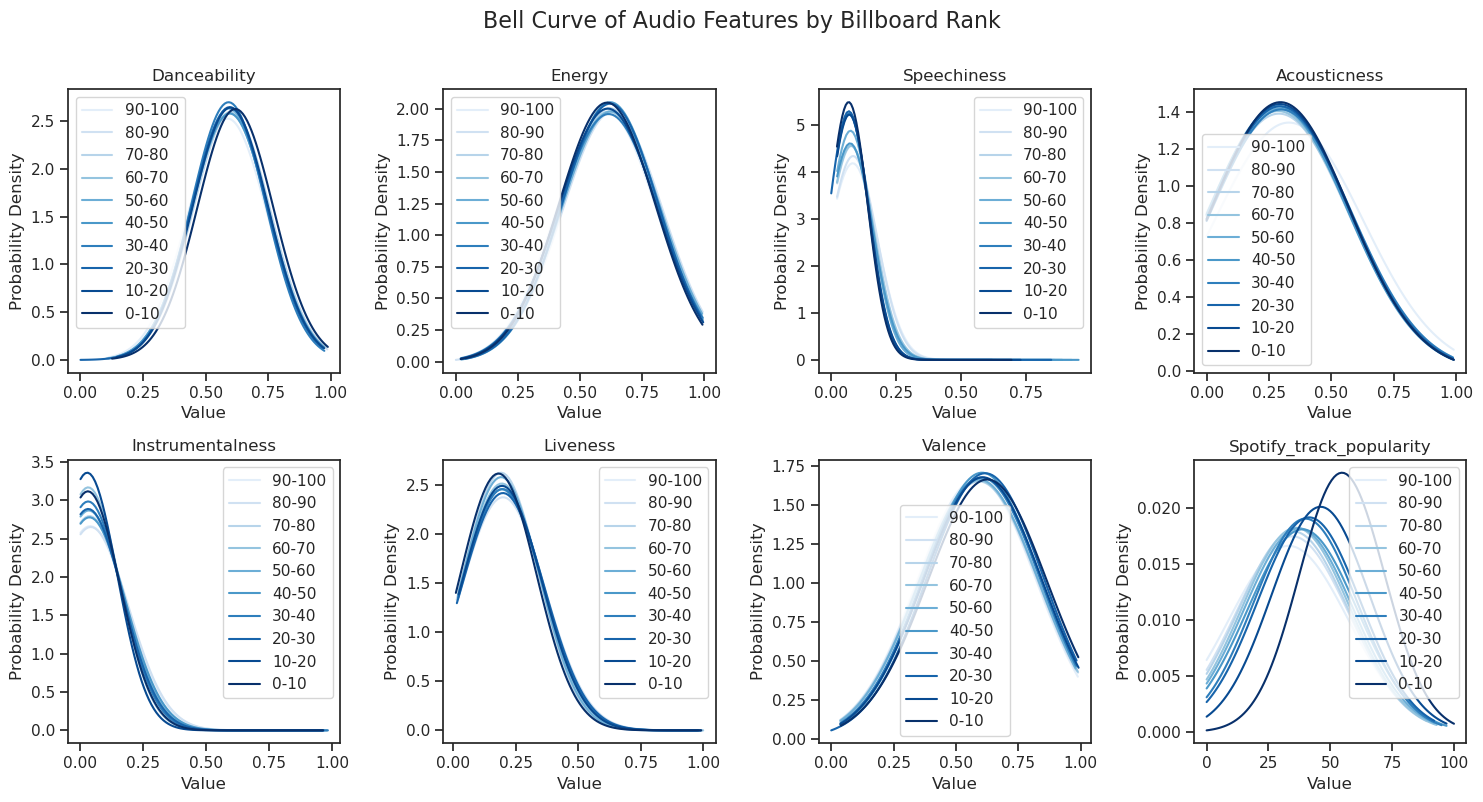

In [85]:
'''Bell Curve of Audio Features by Billboard Rank'''

# create 2x4 subplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# flatten for indexing
axes = axes.flatten()

# choose theme
colormap = plt.cm.get_cmap('Blues_r')

# define the billboard rank ranges
billboard_ranges = [(i, i + 10) for i in range(0, 100, 10)]

# iterate through audio features + popularity score
for i, feature in enumerate(audio_features_list + ['spotify_track_popularity']):
    # plot the bell curve for each decade
    for j, (lower, upper) in reversed(list(enumerate(billboard_ranges))):
        data_subset = af[(af['peak_position'] >= lower) & (af['peak_position'] < upper)]

        # Fit a normal distribution to the data
        mu, std = norm.fit(data_subset[feature])

        # Generate x values for the PDF
        x = np.linspace(data_subset[feature].min(), data_subset[feature].max(), 100)
        # Calculate the PDF using the fitted parameters
        pdf = norm.pdf(x, mu, std)

        # Plot the PDF on the corresponding subplot with colormap
        axes[i].plot(x, pdf, label=f'{lower}-{upper}', color=colormap(j / len(billboard_ranges)))

    # set plot labels and title
    axes[i].set_title(feature.capitalize())
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Probability Density')
    axes[i].legend()

plt.suptitle('Bell Curve of Audio Features by Billboard Rank', fontsize=16, y=1)
plt.tight_layout()
plt.show()

### Audio Features Over Time

How have audio features evolved over the years?

In [53]:
# add year column
af['year'] = af['week_id'].dt.year

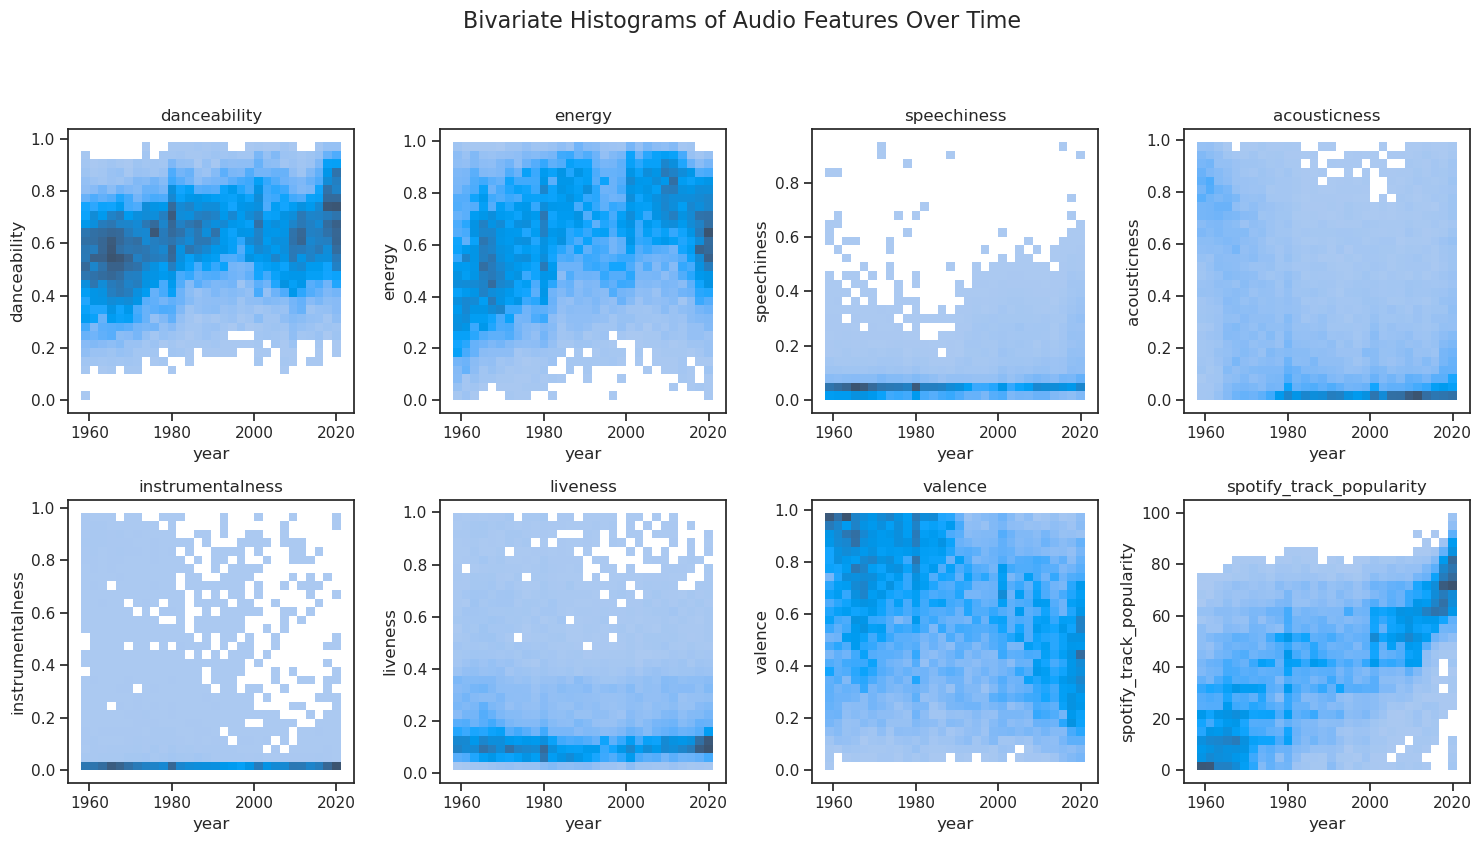

In [55]:
'''Bivariate Histograms of Audio Features Over Time'''

# create 2x4 subplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# flatten for indexing
axes = axes.flatten()

# iterate through audio features + popularity score
for i, feature in enumerate(audio_features_list + ['spotify_track_popularity']):
    sns.histplot(
        data=af, x="year", y=feature, bins=30, ax=axes[i])
    axes[i].set_title(feature)

plt.suptitle('Bivariate Histograms of Audio Features Over Time', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

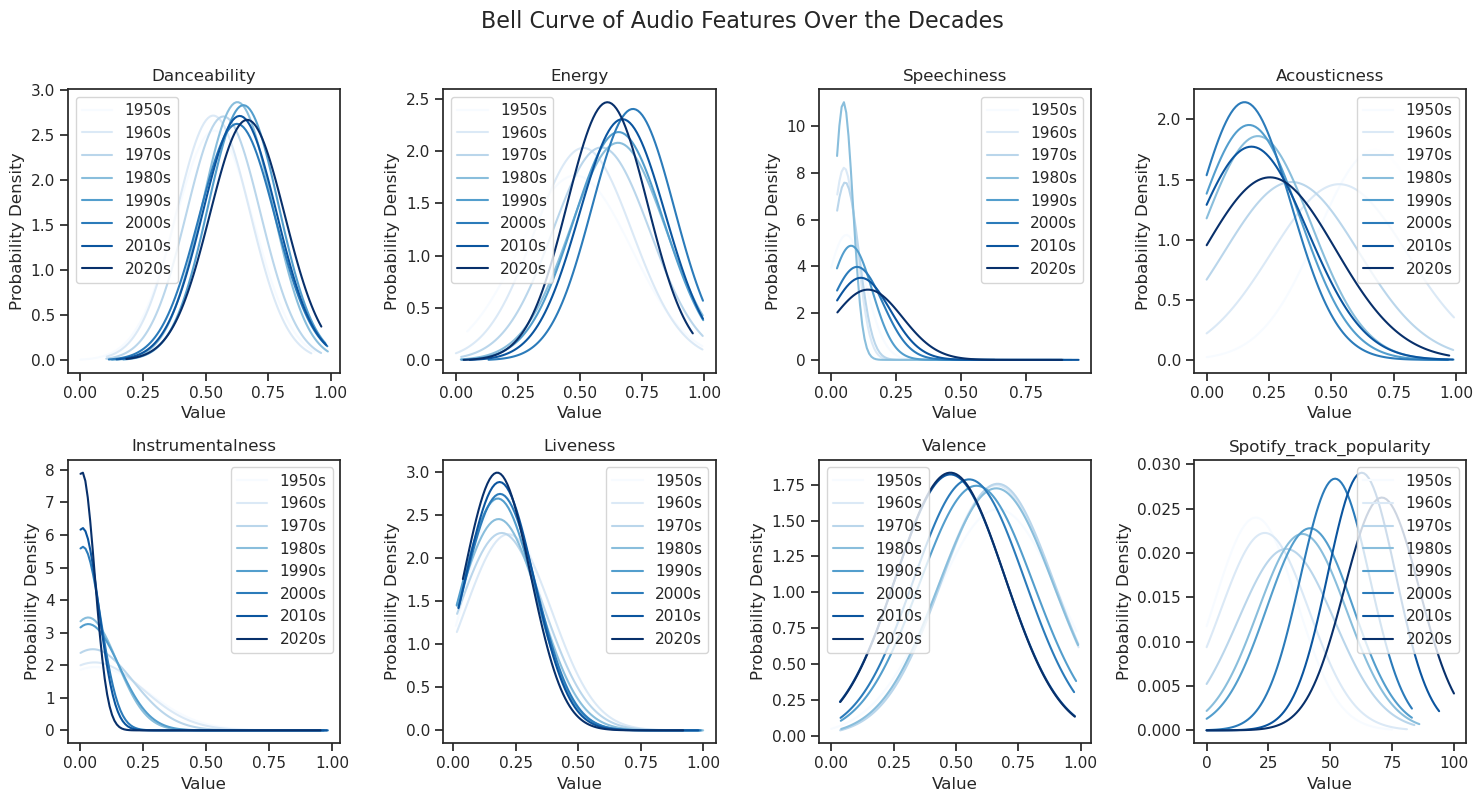

In [64]:
'''Bell Curve of Audio Features Over the Decades'''

# create 2x4 subplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# flatten for indexing
axes = axes.flatten()

# choose theme
colormap = cm.Blues

# iterate through audio features + popularity score
for i, feature in enumerate(audio_features_list + ['spotify_track_popularity']):
    # plot the bell curve for each decade
    for j, decade in enumerate(range(af['year'].min() // 10 * 10, af['year'].max() // 10 * 10 + 10, 10)):
        data_subset = af[(af['year'] >= decade) & (af['year'] < decade + 10)]

        # Fit a normal distribution to the data
        mu, std = norm.fit(data_subset[feature])

        # Generate x values for the PDF
        x = np.linspace(data_subset[feature].min(), data_subset[feature].max(), 100)
        # Calculate the PDF using the fitted parameters
        pdf = norm.pdf(x, mu, std)

        # Plot the PDF on the corresponding subplot with colormap
        axes[i].plot(x, pdf, label=f'{decade}s', color=colormap(j / len(range(af["year"].min(), af["year"].max(), 10))))

    # set plot labels and title
    axes[i].set_title(feature.capitalize())
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Probability Density')
    axes[i].legend()

plt.suptitle('Bell Curve of Audio Features Over the Decades', fontsize=16, y=1)
plt.tight_layout()
plt.show()

### Audio Features by Popularity Score

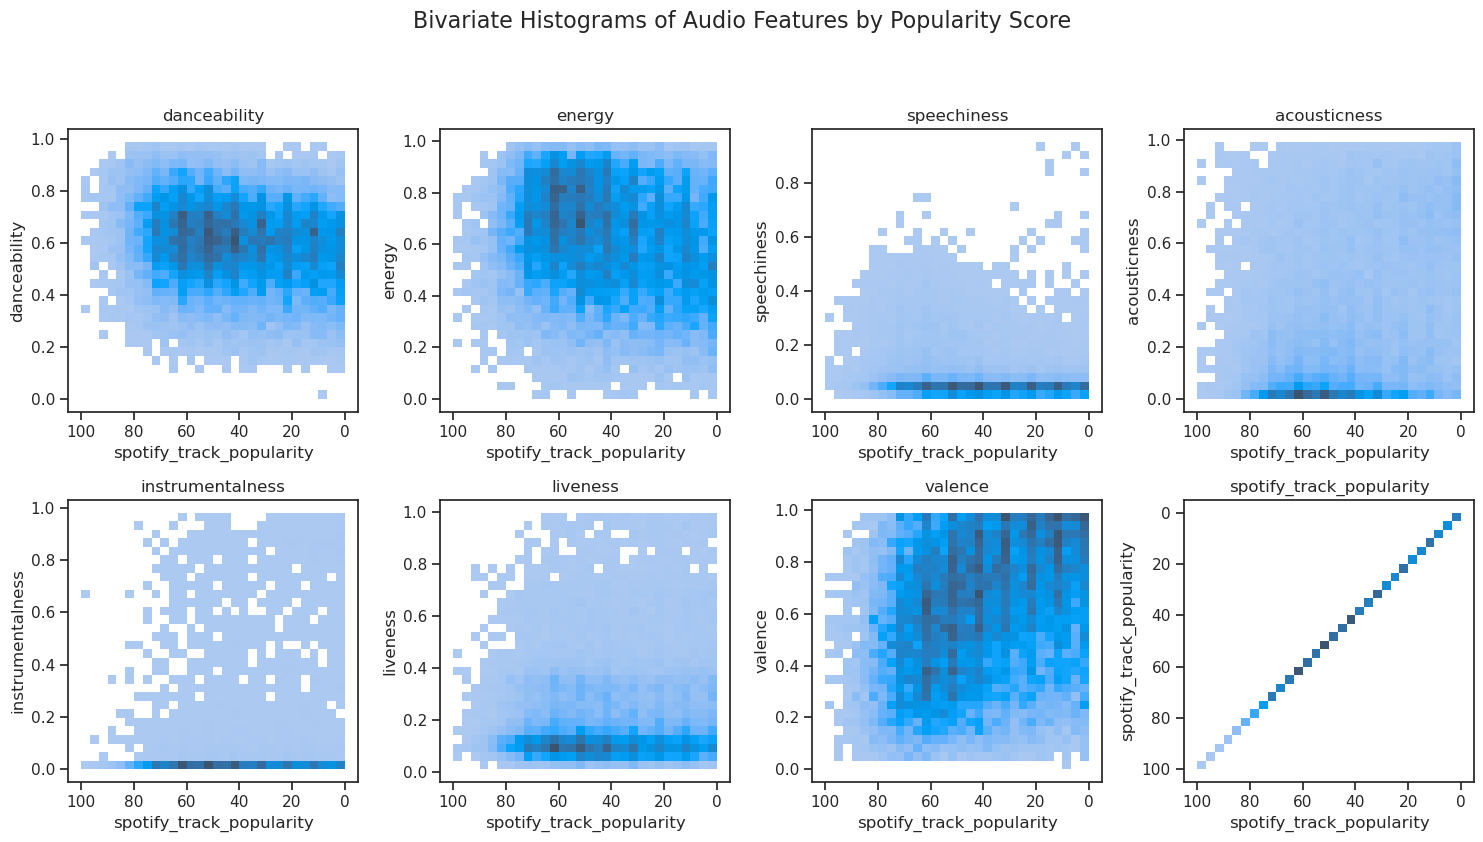

In [69]:
'''Bivariate Histograms of Audio Features by Popularity Score'''

# create 2x4 subplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# flatten for indexing
axes = axes.flatten()

# iterate through audio features + popularity score
for i, feature in enumerate(audio_features_list + ['spotify_track_popularity']):
    sns.histplot(
        data=af, x="spotify_track_popularity", y=feature, bins=30, ax=axes[i])
    axes[i].set_title(feature)
    
    # reverse x-axis
    axes[i].invert_xaxis()
    # reverse y-axis if feature is popularity
    if feature == 'spotify_track_popularity':
        axes[i].invert_yaxis()

plt.suptitle('Bivariate Histograms of Audio Features by Popularity Score', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

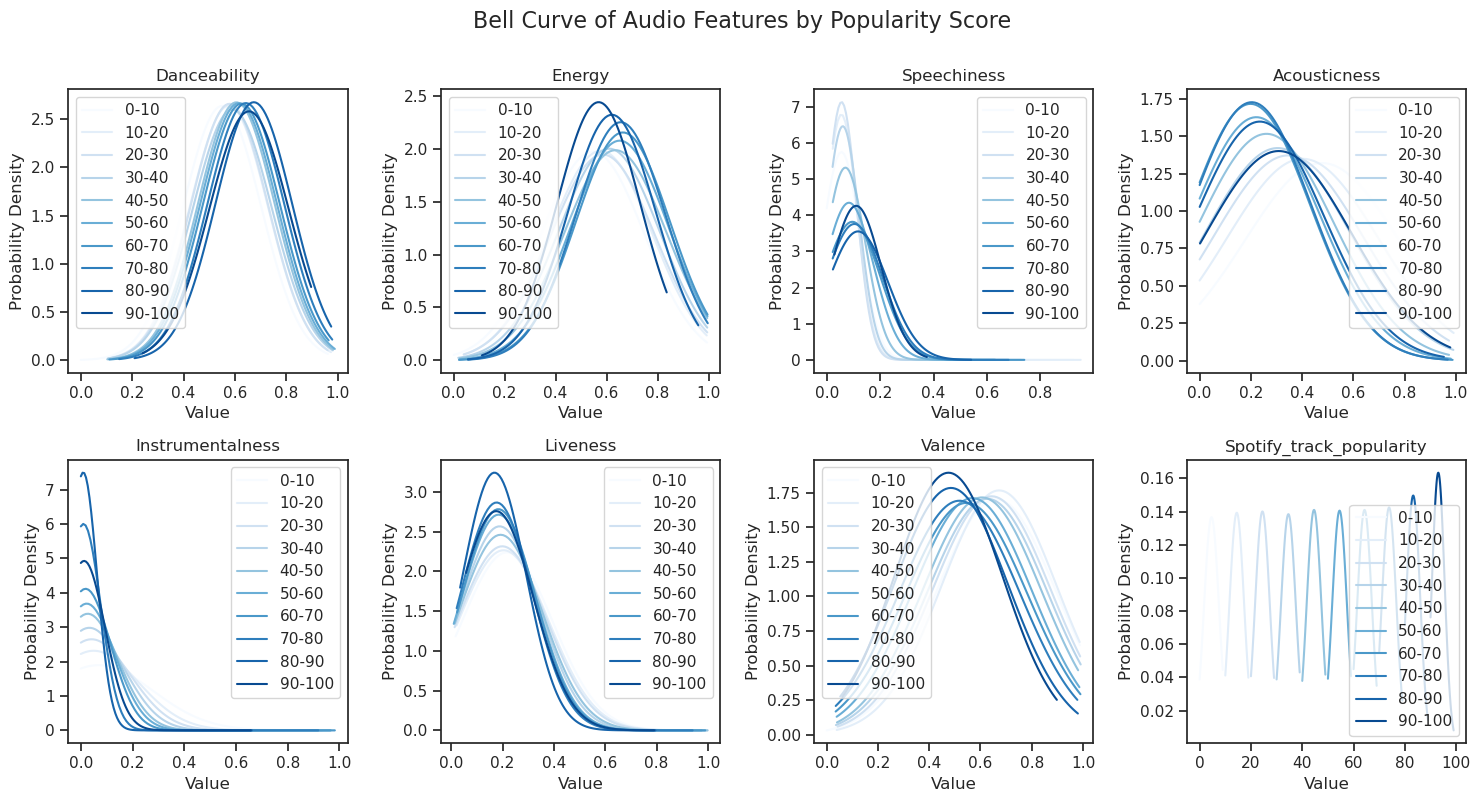

In [66]:
'''Bell Curve of Audio Features by Popularity Score'''

# create 2x4 subplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# flatten for indexing
axes = axes.flatten()

# choose theme
colormap = cm.Blues

# define the popularity ranges
popularity_ranges = [(i, i + 10) for i in range(0, 100, 10)]

# iterate through audio features + popularity score
for i, feature in enumerate(audio_features_list + ['spotify_track_popularity']):
    # plot the bell curve for each decade
    for j, (lower, upper) in enumerate(popularity_ranges):
        data_subset = af[(af['spotify_track_popularity'] >= lower) & (af['spotify_track_popularity'] < upper)]

        # Fit a normal distribution to the data
        mu, std = norm.fit(data_subset[feature])

        # Generate x values for the PDF
        x = np.linspace(data_subset[feature].min(), data_subset[feature].max(), 100)
        # Calculate the PDF using the fitted parameters
        pdf = norm.pdf(x, mu, std)

        # Plot the PDF on the corresponding subplot with colormap
        axes[i].plot(x, pdf, label=f'{lower}-{upper}', color=colormap(j / len(popularity_ranges)))

    # set plot labels and title
    axes[i].set_title(feature.capitalize())
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Probability Density')
    axes[i].legend()

plt.suptitle('Bell Curve of Audio Features by Popularity Score', fontsize=16, y=1)
plt.tight_layout()
plt.show()

### Audio Features by Genre

In [86]:
af.head()

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart,year
0,Solid RockGoanna,Goanna,Solid Rock,"[""australian children's music"", ""children's mu...",275226.0,False,Spirit Of Place (Remastered & Expanded),0.552,0.741,9.0,...,0.00133,0.0317,0.508,148.996,4.0,57.0,71,1983-07-23,7,1983
1,Burning HeartVandenberg,Vandenberg,Burning Heart,"[""australian children's music""]",250693.0,False,Vandenberg,0.438,0.546,11.0,...,0.00000,0.1820,0.486,125.221,4.0,44.0,39,1983-04-09,14,1983
2,Junk Food JunkieLarry Groce,Larry Groce,Junk Food Junkie,"[""children's music"", 'nursery']",196346.0,False,Junk Food Junkie,0.440,0.655,4.0,...,0.00000,0.6070,0.899,205.187,4.0,20.0,9,1976-04-17,15,1976
3,Bad DayAlvin And The Chipmunks,Alvin And The Chipmunks,Bad Day,"[""children's music""]",214666.0,False,Alvin And The Chipmunks (Original Motion Pictu...,0.692,0.663,9.0,...,0.14200,0.1710,0.315,139.995,4.0,35.0,67,2008-01-19,2,2008
4,FunkytownAlvin And The Chipmunks,Alvin And The Chipmunks,Funkytown,"[""children's music""]",214053.0,False,Alvin And The Chipmunks (Original Motion Pictu...,0.807,0.742,0.0,...,0.92900,0.0812,0.285,123.037,4.0,29.0,86,2008-01-19,2,2008
